In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#%matplotlib nbagg
#%matplotlib notebook
#%matplotlib qt
%pylab qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#results = np.load("runhet_recon_sweep_score_mat.npy")
#results = np.load("runp_1_2_sweep_dp_score_mat.npy")
#results = np.load("runp_1_2_sweep_eo_041719_prod_score_mat.npy")
results0 = np.load("results/runagree_large_interact_042919_thresh_0_score_mat.npy")#[:,:-1]
results1 = np.load("results/runagree_large_interact_042919_thresh_1_score_mat.npy")#[:,:-1]
results2 = np.load("results/runagree_large_interact_042919_thresh_2_score_mat.npy")#[:,:-1]
results3 = np.load("results/runagree_large_interact_042919_thresh_3_score_mat.npy")#[:,:-1]
results4 = np.load("results/runagree_large_interact_042919_thresh_4_score_mat.npy")#[:,:-1]

In [3]:
#results = results[:, :]
results = (results0 + results1 + results2 + results3 + results4) / 5
results

array([[0.0677484 , 0.0657452 , 0.06666668, 0.07700324, 0.0630609 ,
        0.07604166, 0.07359774],
       [0.0694311 , 0.07676282, 0.076242  , 0.06858974, 0.06891026,
        0.06434294, 0.0676282 ],
       [0.06959136, 0.0685096 , 0.06814906, 0.07852562, 0.07728364,
        0.07479968, 0.06722758],
       [0.06951124, 0.06794872, 0.07171476, 0.06033652, 0.07179488,
        0.06754808, 0.070633  ],
       [0.07247594, 0.0711939 , 0.06738782, 0.06402244, 0.06806892,
        0.067508  , 0.07047278],
       [0.06466348, 0.07455928, 0.06237982, 0.06221956, 0.07019232,
        0.0647436 , 0.06434296]])

In [4]:
#coeffs = np.array(['0_0', '0_005', '0_01', '0_05', '0_1', '0_2', '0_5', '1_0', '2_0', '4_0', '6_0', '10_0'])
#coeffs = np.array([0. , 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1., 2., 4., 6., 10.])
#xcoeffs = [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0, 4.0]
#ycoeffs = [0.0, 0.001, 0.005, 0.01] #, 0.03]#, 0.05, 0.1, 0.15, 0.2, 0.3]
#xcoeffs = [0.0, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 15.0]
#ycoeffs = [0.0, 0.0005, 0.001, 0.002, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.1] #, 0.7]
#xcoeffs = [0.0, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 15.0]
#ycoeffs = [0.0, 0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.3, 0.5]
#n = len(coeffs)

#7 by 8 runxcoeffs = [0.0, 0.5, 1.0, 3.0, 5.0, 10.0, 15.0]
#ycoeffs = [0.0, 0.002, 0.005, 0.01, 0.03, 0.05, 0.07, 0.1]

#6 by 7 run
xcoeffs = [0.0, 1.0, 3.0, 5.0, 10.0, 15.0]
ycoeffs = [0.0, 0.005, 0.01, 0.03, 0.05, 0.07, 0.1]



In [5]:
X = np.repeat(xcoeffs, len(ycoeffs)).reshape((len(xcoeffs), len(ycoeffs)))
Y = np.repeat(ycoeffs, len(xcoeffs)).reshape((len(xcoeffs), len(ycoeffs)), order='F')
print(X)
print(Y)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 3.  3.  3.  3.  3.  3.  3.]
 [ 5.  5.  5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15. 15. 15.]]
[[0.    0.005 0.01  0.03  0.05  0.07  0.1  ]
 [0.    0.005 0.01  0.03  0.05  0.07  0.1  ]
 [0.    0.005 0.01  0.03  0.05  0.07  0.1  ]
 [0.    0.005 0.01  0.03  0.05  0.07  0.1  ]
 [0.    0.005 0.01  0.03  0.05  0.07  0.1  ]
 [0.    0.005 0.01  0.03  0.05  0.07  0.1  ]]


In [6]:
xmesh = np.linspace(xcoeffs[0], xcoeffs[-1])
ymesh = np.linspace(ycoeffs[0], ycoeffs[-1])
xmeshgrid = np.repeat(xmesh, len(ymesh)).reshape((len(xmesh), len(ymesh)))
ymeshgrid = np.repeat(ymesh, len(xmesh)).reshape((len(xmesh), len(ymesh)), order='F')
#xmeshgrid
#ymeshgrid

logreg = np.ones(xmeshgrid.shape) * 0.0464 #0.1872 #0.238 #0.16500 #0.132 #0.0464 #0.1872 #0.0706 #0.2004 #0.0536 #0.1932


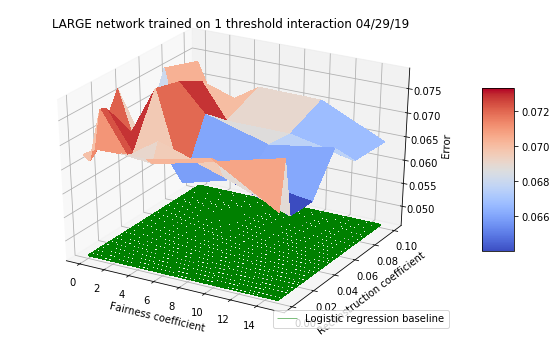

In [7]:
fig = plt.figure(figsize = (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, results, cmap=cm.coolwarm, linewidth=0, antialiased=False, edgecolor='black')
plane = ax.plot_wireframe(xmeshgrid, ymeshgrid, logreg, color='green', linewidth=.5, antialiased=False)
#surf.set_label('Multi-Study LAFTR')
plane.set_label('Logistic regression baseline')
plt.xlabel('Fairness coefficient')
plt.ylabel('Reconstruction coefficient')
plt.title('LARGE network trained on 1 threshold interaction 04/29/19')
ax.set_zlabel('Error')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.legend(loc='lower right')
plt.show()